<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/Aayushi_attempt_number_323432423423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install git+https://github.com/OpenHydrology/lmoments3.git
!pip install cftime
!pip install netCDF4

  Cloning https://github.com/OpenHydrology/lmoments3.git to /tmp/pip-req-build-xbkci039
  Running command git clone --filter=blob:none --quiet https://github.com/OpenHydrology/lmoments3.git /tmp/pip-req-build-xbkci039
  Resolved https://github.com/OpenHydrology/lmoments3.git to commit 7e19f97c23019ca68cbd526b8bd417c412438f1c
  Preparing metadata (setup.py) ... done


In [3]:
import lmoments3 as lm
from lmoments3 import distr
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import glob
import os
import cftime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Historical Precipitation


In [4]:
historical_fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc"
historical_ds = xr.open_dataset(historical_fn, engine="netcdf4")

historical_ds['lon'] = xr.where(historical_ds['lon'] > 180, historical_ds['lon'] - 360, historical_ds['lon'])
historical_ds = historical_ds.sortby('lon')

future_fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_ssp585_r1i1p1f1_gn_20150101-21001231.nc"
future_ds = xr.open_dataset(future_fn, engine="h5netcdf")

future_ds['lon'] = xr.where(future_ds['lon'] > 180, future_ds['lon'] - 360, future_ds['lon'])
future_ds = future_ds.sortby('lon')

In [5]:
lat=historical_ds.lat.values
lon=historical_ds.lon.values

lat=future_ds.lat.values
lon=future_ds.lon.values

In [6]:
future_ds

<xarray.Dataset>
Dimensions:    (time: 31390, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 -177.2 -174.4 -171.6 -168.8 ... 174.4 177.2 180.0
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s8501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/fde56d60-c046-47a4-908d-0a4c66d...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [7]:
if 'tas' in future_ds:
    future_tas = future_ds['tas'].values
else:
    print("The 'tas' variable is not present in the future dataset.")

In [8]:
historical_tas = historical_ds.sel(time = '1850-01-01')
future_tas = future_ds.sel(time = '2100-01-01')


In [9]:
def gev_wrapper(data,T):
    gevfit = gev_fit(data)
    RL = return_levels(gevfit,T)

    return  RL


def gev_fit(data):

    gevfit = distr.gev.lmom_fit(data)
    return gevfit


def return_levels(gevfit,T):

    #Return Level
    RL = distr.gev.ppf(1.0-1./T, **gevfit)

    return RL


In [10]:
#Historical area
latitude= 35.8
longitude= -91

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2

#Identify the index of the min value for lat and lon
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

historical_dsloc= historical_ds.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_historical= historical_dsloc.groupby('time.year').max('time')



In [11]:
annual_max_historical

<xarray.Dataset>
Dimensions:    (year: 165, bnds: 2)
Coordinates:
    lat        float64 34.88
    lon        float64 -90.0
    height     float64 2.0
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (year, bnds) object 1850-12-31 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (year, bnds) float64 33.49 36.28 33.49 ... 36.28 33.49 36.28
    lon_bnds   (year, bnds) float64 268.6 271.4 268.6 ... 271.4 268.6 271.4
    tas        (year) float32 308.5 308.1 307.9 307.4 ... 306.2 306.7 306.4
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/dc83adf2-3502-4f41-8c9b-80e6bf0...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [12]:
#Future area
latitude= 35.8
longitude= -91

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2

#Identify the index of the min value for lat and lon
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

future_dsloc= future_ds.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_future = future_dsloc.groupby('time.year').max('time')

In [13]:
annual_max_future

<xarray.Dataset>
Dimensions:    (year: 86, bnds: 2)
Coordinates:
    lat        float64 34.88
    lon        float64 -90.0
    height     float64 2.0
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (year, bnds) object 2015-12-31 00:00:00 ... 2101-01-01 00:00:00
    lat_bnds   (year, bnds) float64 33.49 36.28 33.49 ... 36.28 33.49 36.28
    lon_bnds   (year, bnds) float64 268.6 271.4 268.6 ... 271.4 268.6 271.4
    tas        (year) float32 311.4 308.9 307.9 307.0 ... 317.4 313.0 312.4
Attributes: (12/53)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s8501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/fde56d60-c046-47a4-908d-0a4c66d...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [14]:
if not np.isnan(np.min(annual_max_historical.tas)):
    annual_max_historicaln=np.array(annual_max_historical.tas)
if not np.isnan(np.min(annual_max_future.tas)):
    annual_max_future=np.array(annual_max_future.tas)

In [30]:
if 'tas' in annual_max_historical:
    historical_tas = annual_max_historical['tas'].values
else:
    print("The 'tas' variable is not present in the historical dataset.")

if 'tas' in annual_max_future:
    future_tas = annual_max_future['tas'].values
else:
    print("The 'tas' variable is not present in the future dataset.")

The 'tas' variable is not present in the future dataset.


In [16]:
print(future_ds)

<xarray.Dataset>
Dimensions:    (time: 31390, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 -177.2 -174.4 -171.6 -168.8 ... 174.4 177.2 180.0
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 252.7 252.9 253.0 ... 276.3 276.3 276.2
Attributes: (12/53)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s8501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:

In [17]:
future_tas = future_ds['tas'].values

In [18]:
future_tas

array([[[252.69188, 252.8631 , 253.04622, ..., 252.11362, 252.30351,
         252.49127],
        [263.21268, 263.63025, 264.03   , ..., 261.7134 , 262.2565 ,
         262.74933],
        [269.94733, 269.9904 , 270.0623 , ..., 270.05438, 270.09708,
         270.01785],
        ...,
        [246.56958, 246.7587 , 246.68427, ..., 245.939  , 246.23303,
         246.45438],
        [247.07126, 247.0656 , 247.03325, ..., 247.12018, 247.08836,
         247.08514],
        [246.57007, 246.49634, 246.41484, ..., 246.83192, 246.73428,
         246.65216]],

       [[251.23346, 251.3842 , 251.55798, ..., 250.70778, 250.88918,
         251.05568],
        [262.85538, 263.31802, 263.7286 , ..., 261.26572, 261.8398 ,
         262.364  ],
        [270.19254, 270.23462, 270.40457, ..., 269.90698, 270.00198,
         270.09213],
        ...,
        [244.99225, 244.89342, 244.8314 , ..., 245.44499, 245.26703,
         245.11183],
        [248.3203 , 248.225  , 248.13023, ..., 248.71364, 248.58206,
   

In [19]:
# Select the 'tas' variable from the Datasets
annual_max_historical_da = annual_max_historical['tas']
annual_max_future_da = future_ds['tas']

# Extract the values as 1D arrays
historical_data = annual_max_historical_da.values.flatten()
future_data = annual_max_future_da.values.flatten()

T_100 = 100



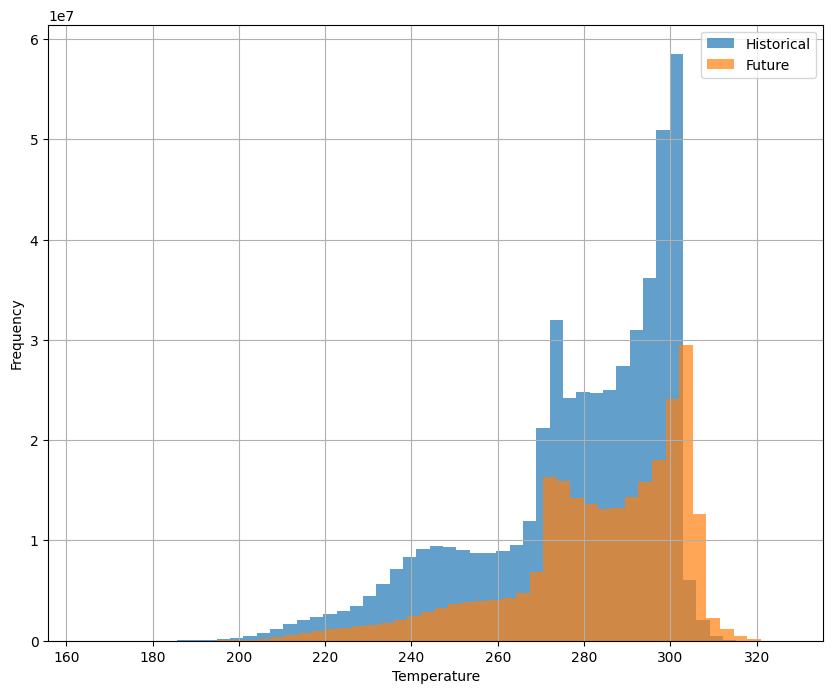

In [45]:
# Select the 'tas' variable from the Datasets
historical_tas = historical_ds['tas']
future_tas = future_ds['tas']
historical_data = historical_tas.values.flatten()
future_data = future_tas.values.flatten()
import numpy as np

# Calculate quantiles (e.g., 95th percentile) for historical and future data
historical_quantile = np.percentile(historical_data, 95)
future_quantile = np.percentile(future_data, 95)
import matplotlib.pyplot as plt

# Plot historical and future temperature data
plt.figure(figsize=[10, 8])
plt.hist(historical_data, bins=50, label='Historical', alpha=0.7)
plt.hist(future_data, bins=50, label='Future', alpha=0.7)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Ensure that historical_RL and future_RL are arrays
historical_RL = np.array(historical_RL)
future_RL = np.array(future_RL)

# Check if historical_RL and future_RL are 0-dimensional scalars
if historical_RL.ndim == 0:
    historical_RL = np.array([historical_RL])  # Convert to a 1D array
if future_RL.ndim == 0:
    future_RL = np.array([future_RL])  # Convert to a 1D array

# Now you can safely access the last element
historical_RL_100 = historical_RL[-1]
future_RL_100 = future_RL[-1]

print(f"100 year Return Level for Urban Area = {historical_RL_100} mm/day")
print(f"100 year Return Level for Rural Area = {future_RL_100} mm/day")


In [40]:
historical_RL_scaled = historical_RL / 1000
future_RL_scaled = future_RL / 1000

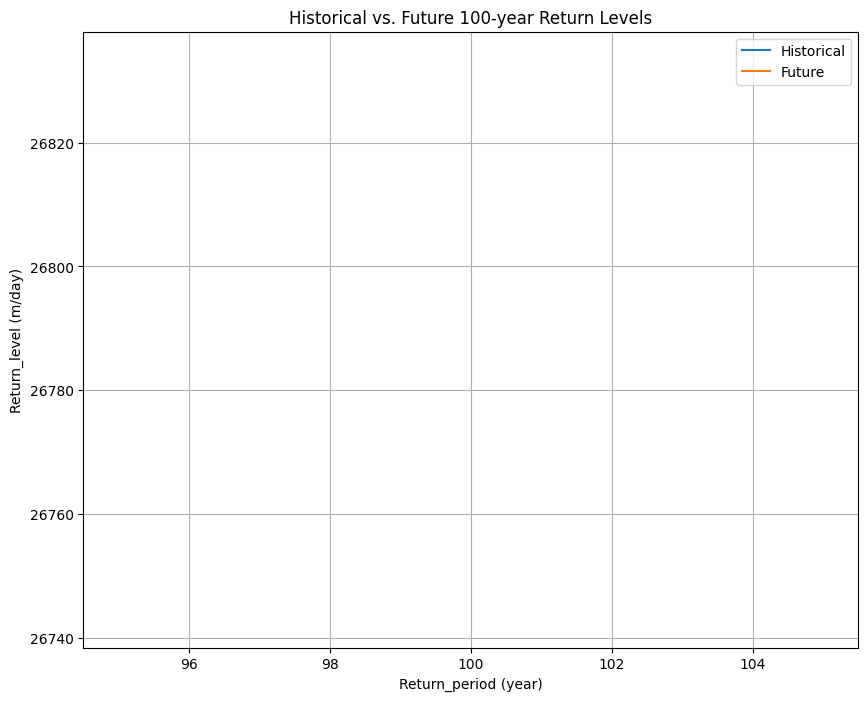

In [43]:
historical_RL_scaled = historical_RL / 1000
future_RL_scaled = future_RL / 1000
plt.figure(figsize=[10, 8])
plt.plot(T_100, historical_RL_scaled, label='Historical')
plt.plot(T_100, future_RL_scaled, label='Future')
plt.grid()
plt.ylabel('Return_level (m/day)')
plt.xlabel('Return_period (year)')
plt.legend()
plt.title('Historical vs. Future 100-year Return Levels')
plt.show()


In [32]:
future_RL

array([26742918.33881299])

In [33]:
T_100

100